In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [129]:
wine_data=pd.read_csv('/content/Wine_clust  (1).csv')
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [130]:
wine_data.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [131]:

wine_data.shape

(178, 13)

In [132]:

wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [133]:
wine_data.describe()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [134]:
 wine_data.isnull().sum()
 #clean data

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

#correlation

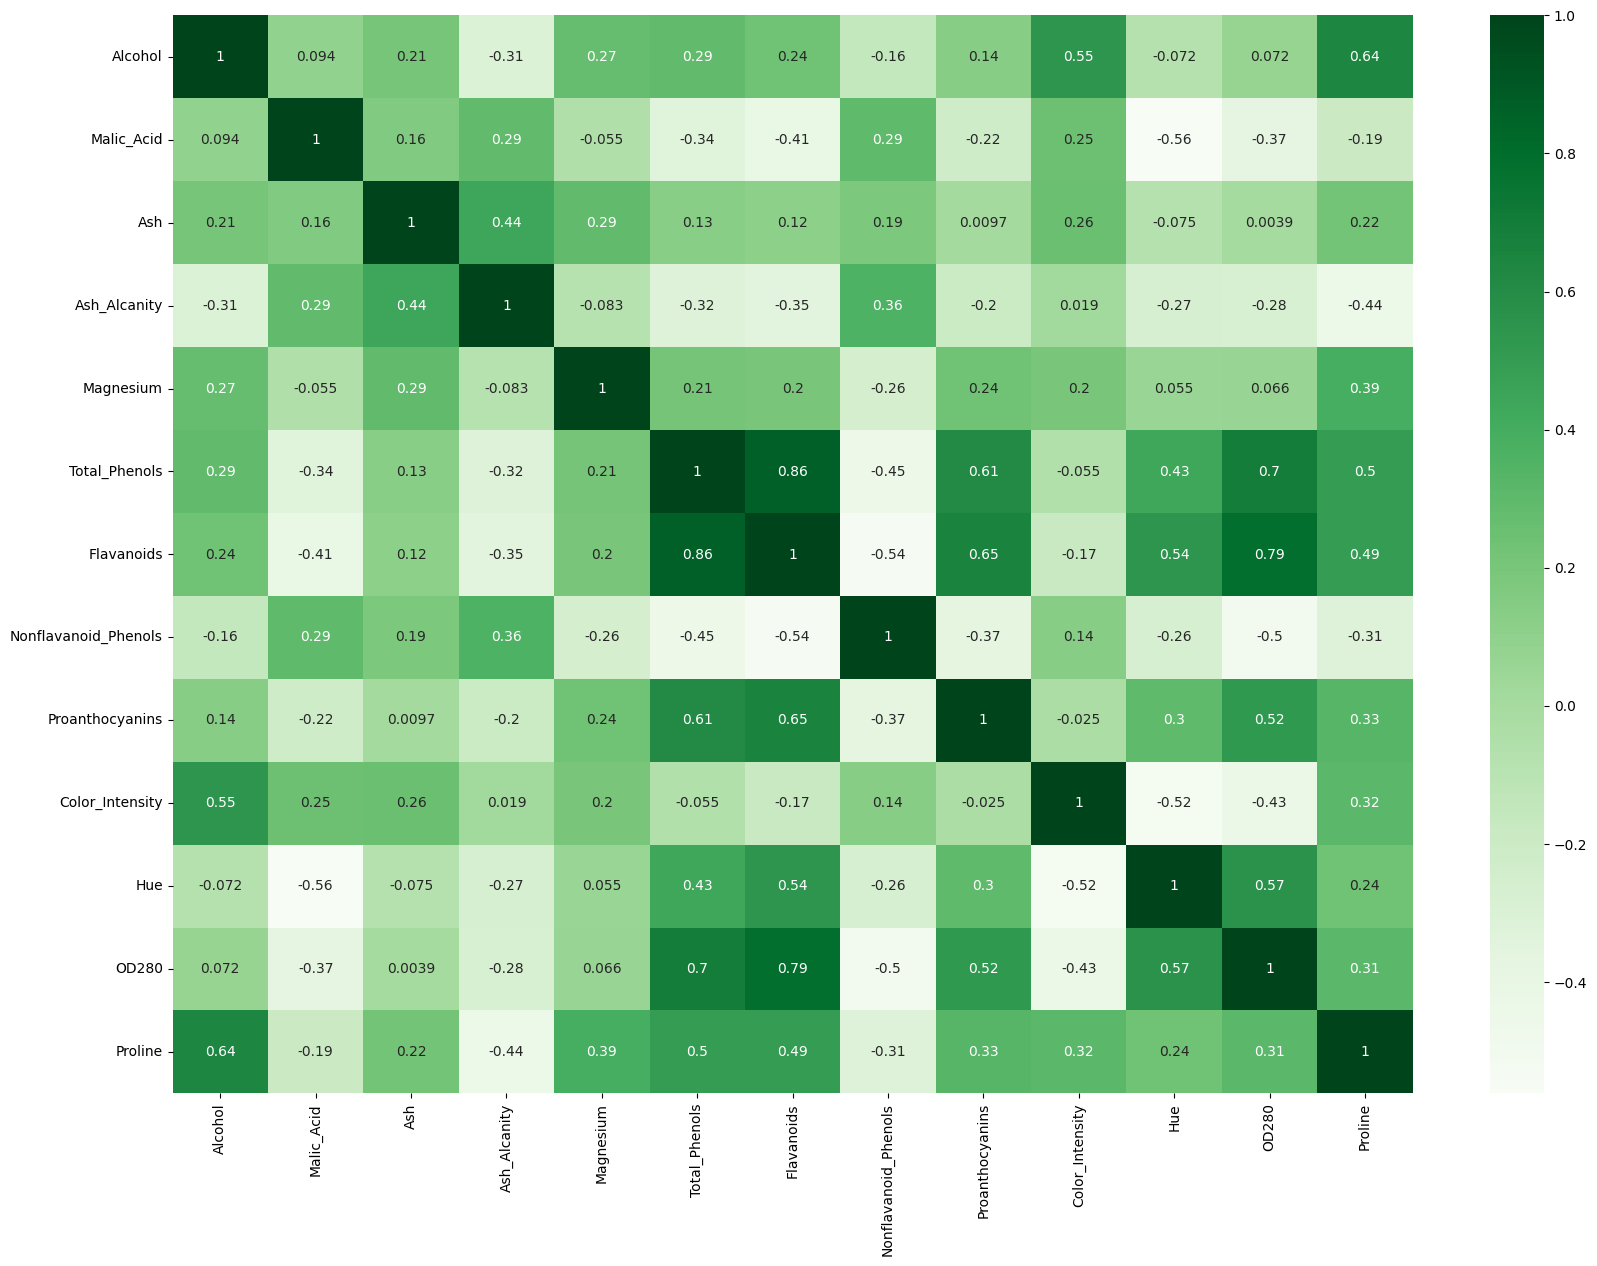

In [135]:
# Inspect feature correlations

plt.figure(figsize=(20,14))
ax = sns.heatmap(wine_data.corr(), cmap='Greens', annot=True)
plt.show()

In [136]:


# Calculate correlation matrix
correlation_matrix = wine_data.corr()

# Find the pair with maximum correlation
max_corr = correlation_matrix.unstack().sort_values(ascending=False)
max_corr_pair = max_corr[max_corr != 1].idxmax()

print("Variables with maximum correlation:")
print(max_corr_pair)

Variables with maximum correlation:
('Total_Phenols', 'Flavanoids')


In [137]:
from sklearn.cluster import KMeans, DBSCAN

In [139]:
x = wine_data.iloc[:,[0,12]].values           #Creating features for further analysis
x

array([[  14.23, 1065.  ],
       [  13.2 , 1050.  ],
       [  13.16, 1185.  ],
       [  14.37, 1480.  ],
       [  13.24,  735.  ],
       [  14.2 , 1450.  ],
       [  14.39, 1290.  ],
       [  14.06, 1295.  ],
       [  14.83, 1045.  ],
       [  13.86, 1045.  ],
       [  14.1 , 1510.  ],
       [  14.12, 1280.  ],
       [  13.75, 1320.  ],
       [  14.75, 1150.  ],
       [  14.38, 1547.  ],
       [  13.63, 1310.  ],
       [  14.3 , 1280.  ],
       [  13.83, 1130.  ],
       [  14.19, 1680.  ],
       [  13.64,  845.  ],
       [  14.06,  780.  ],
       [  12.93,  770.  ],
       [  13.71, 1035.  ],
       [  12.85, 1015.  ],
       [  13.5 ,  845.  ],
       [  13.05,  830.  ],
       [  13.39, 1195.  ],
       [  13.3 , 1285.  ],
       [  13.87,  915.  ],
       [  14.02, 1035.  ],
       [  13.73, 1285.  ],
       [  13.58, 1515.  ],
       [  13.68,  990.  ],
       [  13.76, 1235.  ],
       [  13.51, 1095.  ],
       [  13.48,  920.  ],
       [  13.28,  880.  ],
 

#Elbow method
-to find optimal value of k

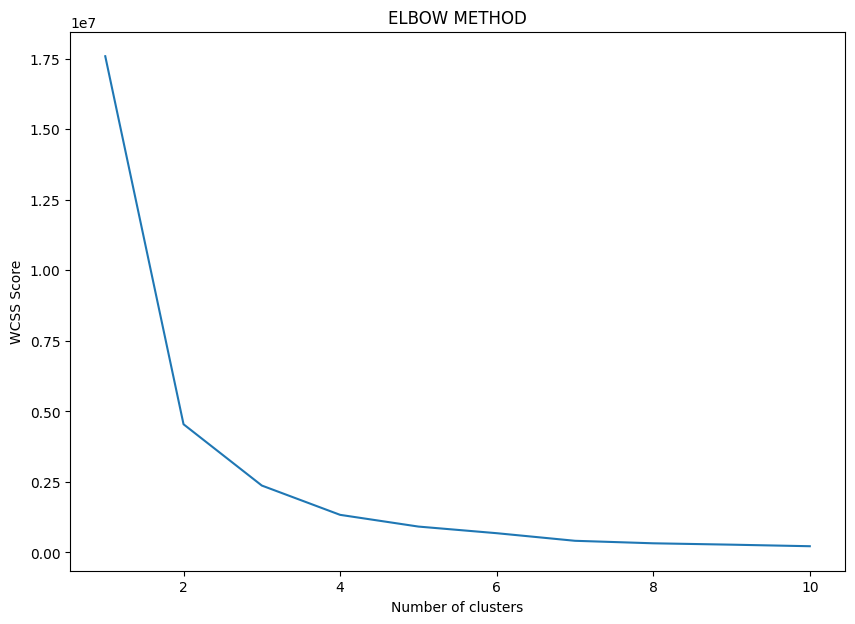

In [140]:

# Elbow method
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=101)
  km.fit(data)
  wcss.append(km.inertia_)

#plot wcss vs k
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Score')
plt.show()


kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

In [141]:
import warnings
warnings.filterwarnings("ignore")

In [142]:

kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

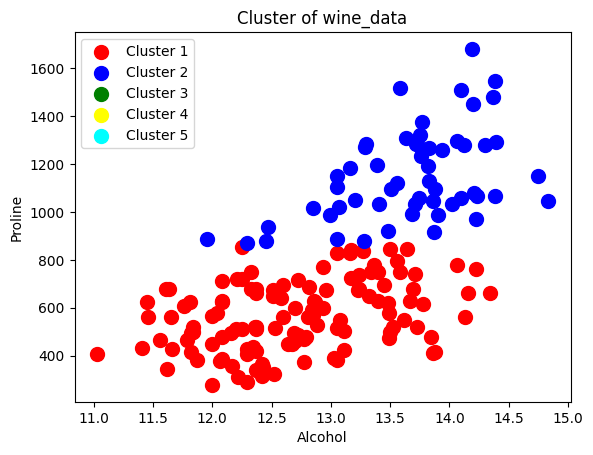

In [144]:

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='yellow',label='Cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='cyan',label='Cluster 5')
plt.title('Cluster of wine_data')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.legend()
plt.show()

Calculate Silhoutte Score

In [145]:

from sklearn.metrics import silhouette_score
silhouette_score_avg=silhouette_score(x,y_kmeans)
silhouette_score_avg

0.6605508700594223

A GOOD SCORE OF .66 IS OBTAINED WHEN WE USE KMEANS AND KMEANS++ METHOD VIA DOING AND OPTIMUM CLUSTER COUNT WAS FOUND OUT TO BE 2

In [146]:

x = wine_data.iloc[:,[5,6]].values
x

array([[2.8 , 3.06],
       [2.65, 2.76],
       [2.8 , 3.24],
       [3.85, 3.49],
       [2.8 , 2.69],
       [3.27, 3.39],
       [2.5 , 2.52],
       [2.6 , 2.51],
       [2.8 , 2.98],
       [2.98, 3.15],
       [2.95, 3.32],
       [2.2 , 2.43],
       [2.6 , 2.76],
       [3.1 , 3.69],
       [3.3 , 3.64],
       [2.85, 2.91],
       [2.8 , 3.14],
       [2.95, 3.4 ],
       [3.3 , 3.93],
       [2.7 , 3.03],
       [3.  , 3.17],
       [2.41, 2.41],
       [2.61, 2.88],
       [2.48, 2.37],
       [2.53, 2.61],
       [2.63, 2.68],
       [2.85, 2.94],
       [2.4 , 2.19],
       [2.95, 2.97],
       [2.65, 2.33],
       [3.  , 3.25],
       [2.86, 3.19],
       [2.42, 2.69],
       [2.95, 2.74],
       [2.35, 2.53],
       [2.7 , 2.98],
       [2.6 , 2.68],
       [2.45, 2.43],
       [2.4 , 2.64],
       [3.  , 3.04],
       [3.15, 3.29],
       [2.45, 2.68],
       [3.25, 3.56],
       [2.64, 2.63],
       [3.  , 3.  ],
       [2.85, 2.65],
       [3.25, 3.17],
       [3.1 ,

In [147]:

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [148]:
wcss


[245.92525280898877,
 67.47656579380138,
 41.86847084826762,
 29.507814234034704,
 23.3660840337763,
 19.294616804119343,
 16.51412181359195,
 14.411046154401152,
 12.497867989417989,
 10.939998036759924]

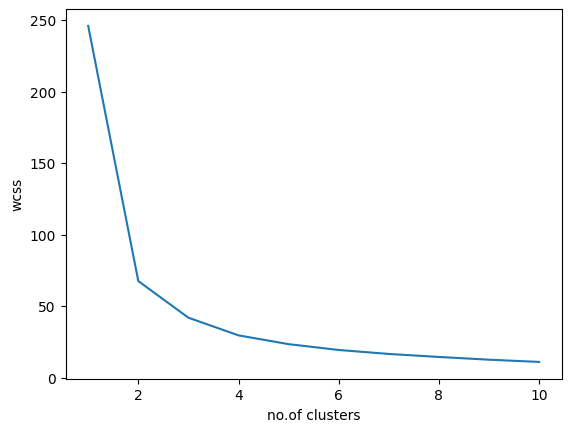

In [149]:

plt.plot(range(1,11),wcss)
plt.xlabel('no.of clusters')
plt.ylabel('wcss')
plt.show()

#2 is the optimum no. of clusters

In [150]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

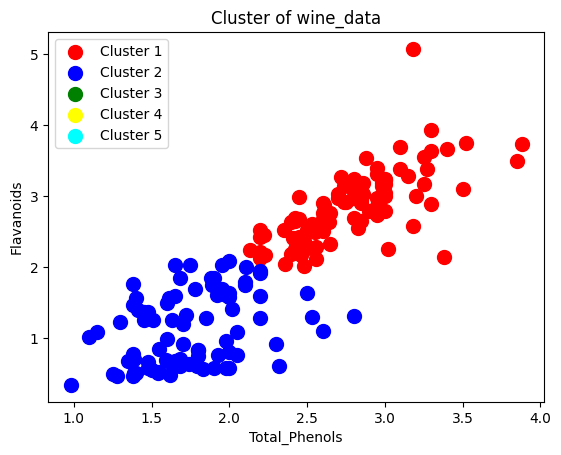

In [151]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='yellow',label='Cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='cyan',label='Cluster 5')
plt.title('Cluster of wine_data')
plt.xlabel('Total_Phenols')
plt.ylabel('Flavanoids')
plt.legend()
plt.show()

In [152]:
wine_data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

silhouette_score between Total_Phenols VS Flavanoids

In [153]:
from sklearn.metrics import silhouette_score
silhouette_score_avg2 = silhouette_score(x,y_kmeans)
silhouette_score_avg2

0.6048450304639407

OBTAINED .66 & .60 SIL SCORE FOR BOTH THE CASES WHILE TAKING CLUSTER NUMBER AS 2.

# 2.AGGOLOMERATIVE HC METHOD

In [155]:
X = wine_data.iloc[:,[0,12]].values
X

array([[  14.23, 1065.  ],
       [  13.2 , 1050.  ],
       [  13.16, 1185.  ],
       [  14.37, 1480.  ],
       [  13.24,  735.  ],
       [  14.2 , 1450.  ],
       [  14.39, 1290.  ],
       [  14.06, 1295.  ],
       [  14.83, 1045.  ],
       [  13.86, 1045.  ],
       [  14.1 , 1510.  ],
       [  14.12, 1280.  ],
       [  13.75, 1320.  ],
       [  14.75, 1150.  ],
       [  14.38, 1547.  ],
       [  13.63, 1310.  ],
       [  14.3 , 1280.  ],
       [  13.83, 1130.  ],
       [  14.19, 1680.  ],
       [  13.64,  845.  ],
       [  14.06,  780.  ],
       [  12.93,  770.  ],
       [  13.71, 1035.  ],
       [  12.85, 1015.  ],
       [  13.5 ,  845.  ],
       [  13.05,  830.  ],
       [  13.39, 1195.  ],
       [  13.3 , 1285.  ],
       [  13.87,  915.  ],
       [  14.02, 1035.  ],
       [  13.73, 1285.  ],
       [  13.58, 1515.  ],
       [  13.68,  990.  ],
       [  13.76, 1235.  ],
       [  13.51, 1095.  ],
       [  13.48,  920.  ],
       [  13.28,  880.  ],
 

#Plotting dendrogram
to find the cluster points

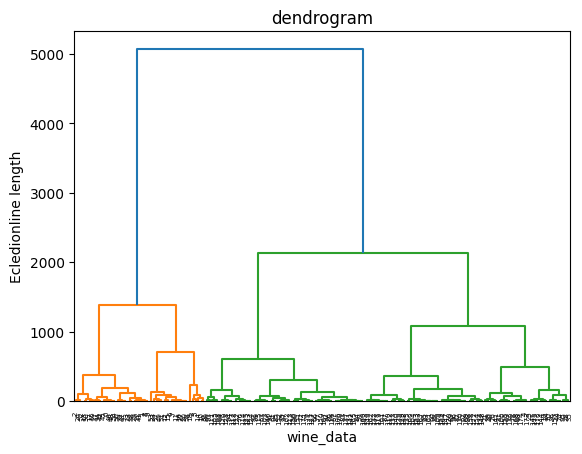

In [156]:
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('dendrogram')
plt.xlabel('wine_data')
plt.ylabel('Ecledionline length')
plt.show()

DENDROGRAM OPTIMUM CLUSTERS is 2                
sine the asummed straight line drawn between the longest Ecledionline length biscets at 2 points. Hence optimum cluster points is 2

In [157]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [158]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

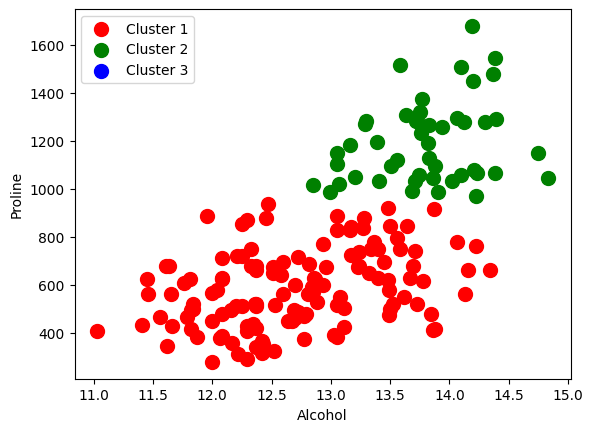

In [159]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='green',label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue',label='Cluster 3')
plt.xlabel("Alcohol")
plt.ylabel("Proline")
plt.legend();

In [160]:
wine_data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [161]:
from sklearn.metrics import silhouette_score
sil=silhouette_score(X,y_hc)

In [162]:
sil

0.6605196082796134

# 3.dB scan clustering

In [163]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
wine_data['DBSCAN_Cluster'] = dbscan.fit_predict(wine_data)

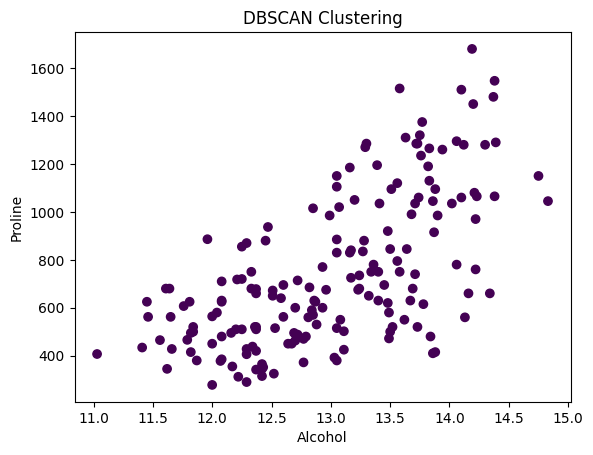

In [164]:
plt.scatter(wine_data['Alcohol'],wine_data['Proline'], c=wine_data['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.show()

In [165]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples according to your dataset
clusters = dbscan.fit_predict(wine_data)

# Add cluster labels to the dataframe
wine_data['DBSCAN_Cluster'] = clusters

# Output the number of clusters and noise points
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
num_noise_points = list(clusters).count(-1)
print(f'Number of clusters: {num_clusters}')
print(f'Number of noise points: {num_noise_points}')

Number of clusters: 0
Number of noise points: 178


In [166]:
from sklearn.cluster import DBSCAN

Best Silhouette Score: -0.1608160213839871
Best eps: 0.9
Best min_samples: 2


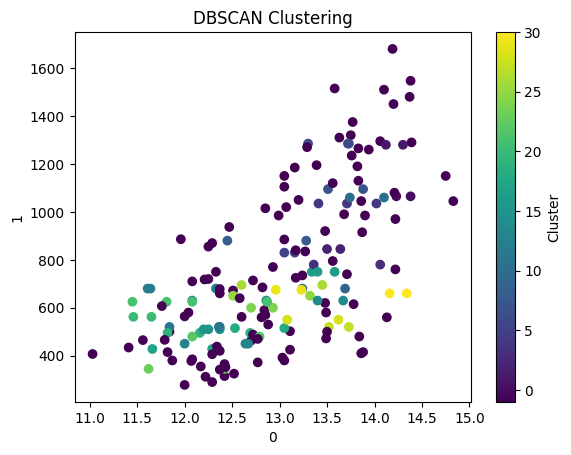

In [168]:
X_df = pd.DataFrame(X)
feature_names = X_df.columns


# Determine optimal parameters (eps and min_samples) using silhouette score
best_score = -1
best_eps = 0
best_min_samples = 0

for eps in np.arange(0.1, 1.0, 0.1):
    for min_samples in range(2, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)
        if len(np.unique(clusters)) > 1:
            silhouette_avg = silhouette_score(X, clusters)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print("Best Silhouette Score:", best_score)
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)

# Fit DBSCAN with optimal parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("DBSCAN Clustering")
plt.colorbar(label='Cluster')
plt.show()